# Please read:

We have already defined the dataset below. 
And also have defined X_train and y_train. Please build a model and test it with X_test.


You should build a neural network model in Keras.

# Section A

In [1]:
from keras.datasets import mnist
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, Dropout
from keras.utils import np_utils, normalize
from sklearn.preprocessing import OneHotEncoder
from keras.optimizers import Adam
(X_train, y_train), (X_test, y_test) = mnist.load_data()


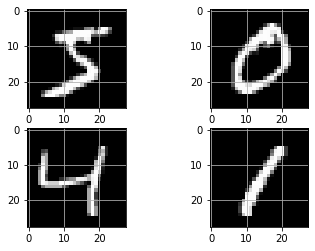

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.grid('off')
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.grid('off')
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.grid('off')
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
plt.grid('off')
plt.show()

In [3]:
# In the preceding code, we are importing the relevant Keras files and are also importing the MNIST dataset 
#(which is provided as a built-in dataset in Keras). 

# The MNIST dataset contains images of digits where the images are of 28 x 28 in shape. 
# You can see in the plots what they will look like.

# Section B - HW Neural Network starts here

In [4]:
# 1. Import the relevant packages and datasets

In [5]:
from keras import optimizers
print(len(X_train))

60000


In [6]:
#2. Preprocess the targets (convert them into one-hot encoded vectors) so that we can perform optimization on top of them:
#We shall be minimizing categorical cross entropy loss

#- 2points

In [7]:
no_classes = len(np.unique(y_train)) #shaping sets
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test =  X_test.reshape(X_test.shape[0], 28, 28, 1)

In [8]:
onehot_encoder = OneHotEncoder(sparse=False) #encoding
y_train = y_train.reshape(len(y_train), 1)
y_train = onehot_encoder.fit_transform(y_train)
y_test = y_test.reshape(len(y_test), 1)
y_test = onehot_encoder.fit_transform(y_test)

In [9]:
X_train = normalize(X_train) #normalizing
X_test = normalize(X_test)

In [10]:
#3. Initialize a model - 1 point

In [11]:
model = Sequential() #building model
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(no_classes, activation='softmax'))

In [12]:
model.compile(loss='mean_squared_error', optimizer=Adam(), metrics=['accuracy']) #using adam optimizer because of sparce data 

# Define the model architecture:
Specify the number of units in a hidden layer
Specify the activation function that is to be performed in a hidden layer
Specify the number of hidden layers
Specify the loss function that we want to minimize
Provide the optimizer that will minimize the loss function

In [13]:
#5. Fit the model 

In [14]:
model.fit(X_train, y_train, batch_size=250, epochs=25, verbose=1, validation_split=0.20)

Epoch 1/25
192/192 [==============================] - 30s 154ms/step - loss: 0.0225 - accuracy: 0.8313 - val_loss: 0.0156 - val_accuracy: 0.8737
Epoch 2/25
192/192 [==============================] - 31s 161ms/step - loss: 0.0065 - accuracy: 0.9527 - val_loss: 0.0039 - val_accuracy: 0.9752
Epoch 3/25
192/192 [==============================] - 30s 158ms/step - loss: 0.0022 - accuracy: 0.9862 - val_loss: 0.0032 - val_accuracy: 0.9795
Epoch 4/25
192/192 [==============================] - 31s 162ms/step - loss: 0.0016 - accuracy: 0.9902 - val_loss: 0.0025 - val_accuracy: 0.9842
Epoch 5/25
192/192 [==============================] - 30s 157ms/step - loss: 0.0011 - accuracy: 0.9935 - val_loss: 0.0025 - val_accuracy: 0.9836
Epoch 6/25
192/192 [==============================] - 30s 157ms/step - loss: 6.9639e-04 - accuracy: 0.9960 - val_loss: 0.0028 - val_accuracy: 0.9818
Epoch 7/25
192/192 [==============================] - 30s 156ms/step - loss: 6.4330e-04 - accuracy: 0.9964 - val_loss: 0.0026 

In [15]:
#6. Test the model

In [16]:
#7. Calculate the accuracy and loss values on top of the test dataset - 2 points

In [17]:
# Results - Accuracy
scores=model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy:%.2f%%\n"%(scores[1]*100))
scores=model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:%.2f%%\n"%(scores[1]*100))
model.summary()


Training Accuracy:99.60%

Testing Accuracy:98.29%

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 36864)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               9437440   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 9,458,826
Trainable params: 9,458,826
Non-trainable params: 0
_________________________________________________________________


# HW - Decision Trees

### Please follow the instructions given during the class/demo

### Load sklearn's wine dataset and perform classification using Decision trees. Try different pruning techniques, criteria to split the tree which gives you best results. Plot the three and comment on your findings.

In [89]:
from sklearn.metrics import confusion_matrix 
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import tree
from matplotlib import pyplot as plt
import graphviz

In [90]:
def importdata(): 
    dataset = datasets.load_wine()
      
    # Printing the dataswet shape 
    print ("Dataset Length: ", len(dataset)) 
    
    return dataset 

In [91]:
# Function to split the dataset 
def splitdataset(dataset): 
  
    X = dataset.data
    Y = dataset.target
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)
      
    return X, Y, X_train, X_test, y_train, y_test 

In [92]:
# Function to perform training with giniIndex. 
def train_using_gini(X_train, X_test, y_train): 
  
    # Creating the classifier object 
    clf_gini = DecisionTreeClassifier(criterion = "gini", 
            random_state = 100,max_depth=3, min_samples_leaf=5) 
  
    # Performing training 
    clf_gini.fit(X_train, y_train) 
    return clf_gini 
 

In [93]:
# Function to perform training with giniIndex. 
def train_using_entropy(X_train, X_test, y_train): 
  
    # Creating the classifier object 
    clf_entropy = DecisionTreeClassifier(criterion = "entropy", 
            random_state = 100,max_depth=3, min_samples_leaf=5) 
  
    # Performing training 
    clf_entropy.fit(X_train, y_train) 
    return clf_entropy

In [94]:
def prediction(X_test, clf_object): 
  
    # Predicton on test with giniIndex 
    y_pred = clf_object.predict(X_test) 
    print("Predicted values:") 
    print(y_pred) 
    return y_pred 

In [95]:
def cal_accuracy(y_test, y_pred): 
      
    print("Confusion Matrix: ", 
        confusion_matrix(y_test, y_pred)) 
      
    print ("Accuracy : ", 
    accuracy_score(y_test,y_pred)*100) 
      
    print("Report : ", 
    classification_report(y_test, y_pred)) 

In [101]:
def main(): 
      
    # Building Phase 
    data = importdata() 
    X, Y, X_train, X_test, y_train, y_test = splitdataset(data) 
    clf_gini = train_using_gini(X_train, X_test, y_train) 
    clf_entropy = train_using_entropy(X_train, X_test, y_train) 
    
    # Operational Phase 
    print("Results Using Gini Index:") 
      
    # Prediction using gini 
    y_pred_gini = prediction(X_test, clf_gini) 
    cal_accuracy(y_test, y_pred_gini) 
    #graph
    fig = plt.figure(figsize=(25,20))
    _ = tree.plot_tree(clf_gini,
                   filled=True)
    
    # Operational Phase 2
    print("Results Using Entropy Index:") 
      
    # Prediction using entropy 
    y_pred_entropy = prediction(X_test, clf_entropy) 
    cal_accuracy(y_test, y_pred_entropy) 
    #graph
    fig = plt.figure(figsize=(25,20))
    _ = tree.plot_tree(clf_entropy,
                   filled=True)
    
    return data

Dataset Length:  6
Results Using Gini Index:
Predicted values:
[1 0 1 1 0 2 2 1 1 2 0 2 1 2 1 0 2 1 0 0 2 1 2 0 0 1 1 1 2 1 1 2 1 1 2 1 2
 1 2 0 0 2 1 0 1]
Confusion Matrix:  [[11  2  0]
 [ 0 13  2]
 [ 0  5 12]]
Accuracy :  80.0
Report :                precision    recall  f1-score   support

           0       1.00      0.85      0.92        13
           1       0.65      0.87      0.74        15
           2       0.86      0.71      0.77        17

    accuracy                           0.80        45
   macro avg       0.84      0.81      0.81        45
weighted avg       0.83      0.80      0.80        45

Results Using Entropy Index:
Predicted values:
[2 0 1 1 0 2 2 0 1 2 0 2 1 2 2 0 2 1 0 0 2 1 2 0 0 1 1 2 2 1 2 2 1 1 2 1 2
 0 2 0 0 2 1 0 1]
Confusion Matrix:  [[13  0  0]
 [ 0 13  2]
 [ 0  1 16]]
Accuracy :  93.33333333333333
Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.93      0.87  

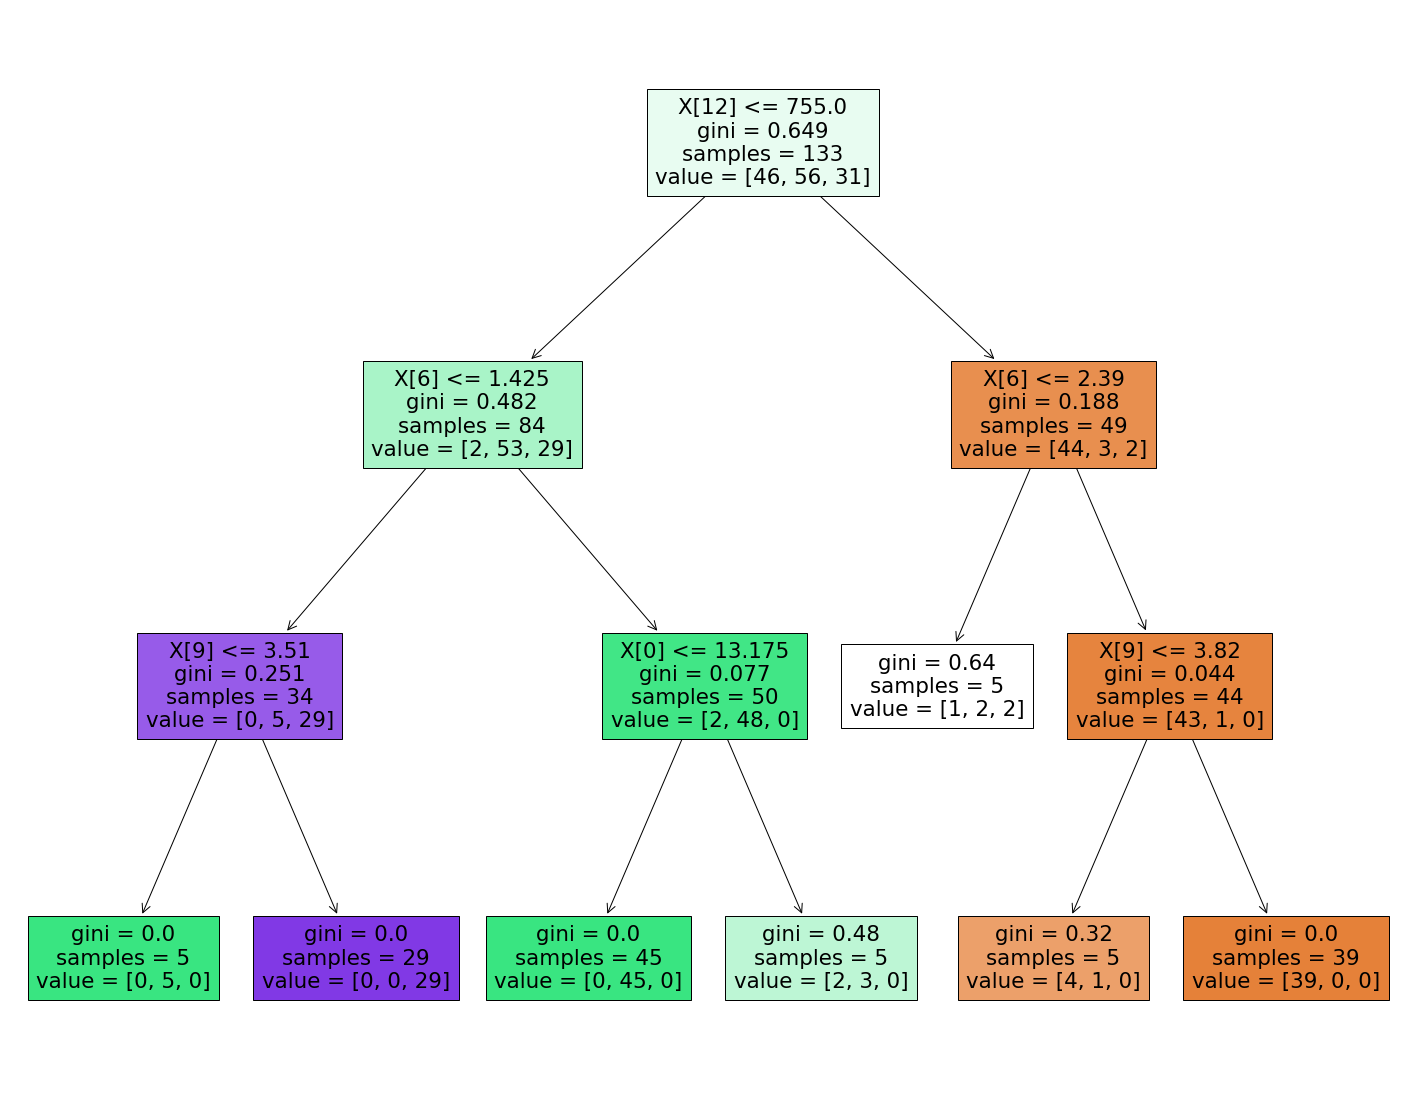

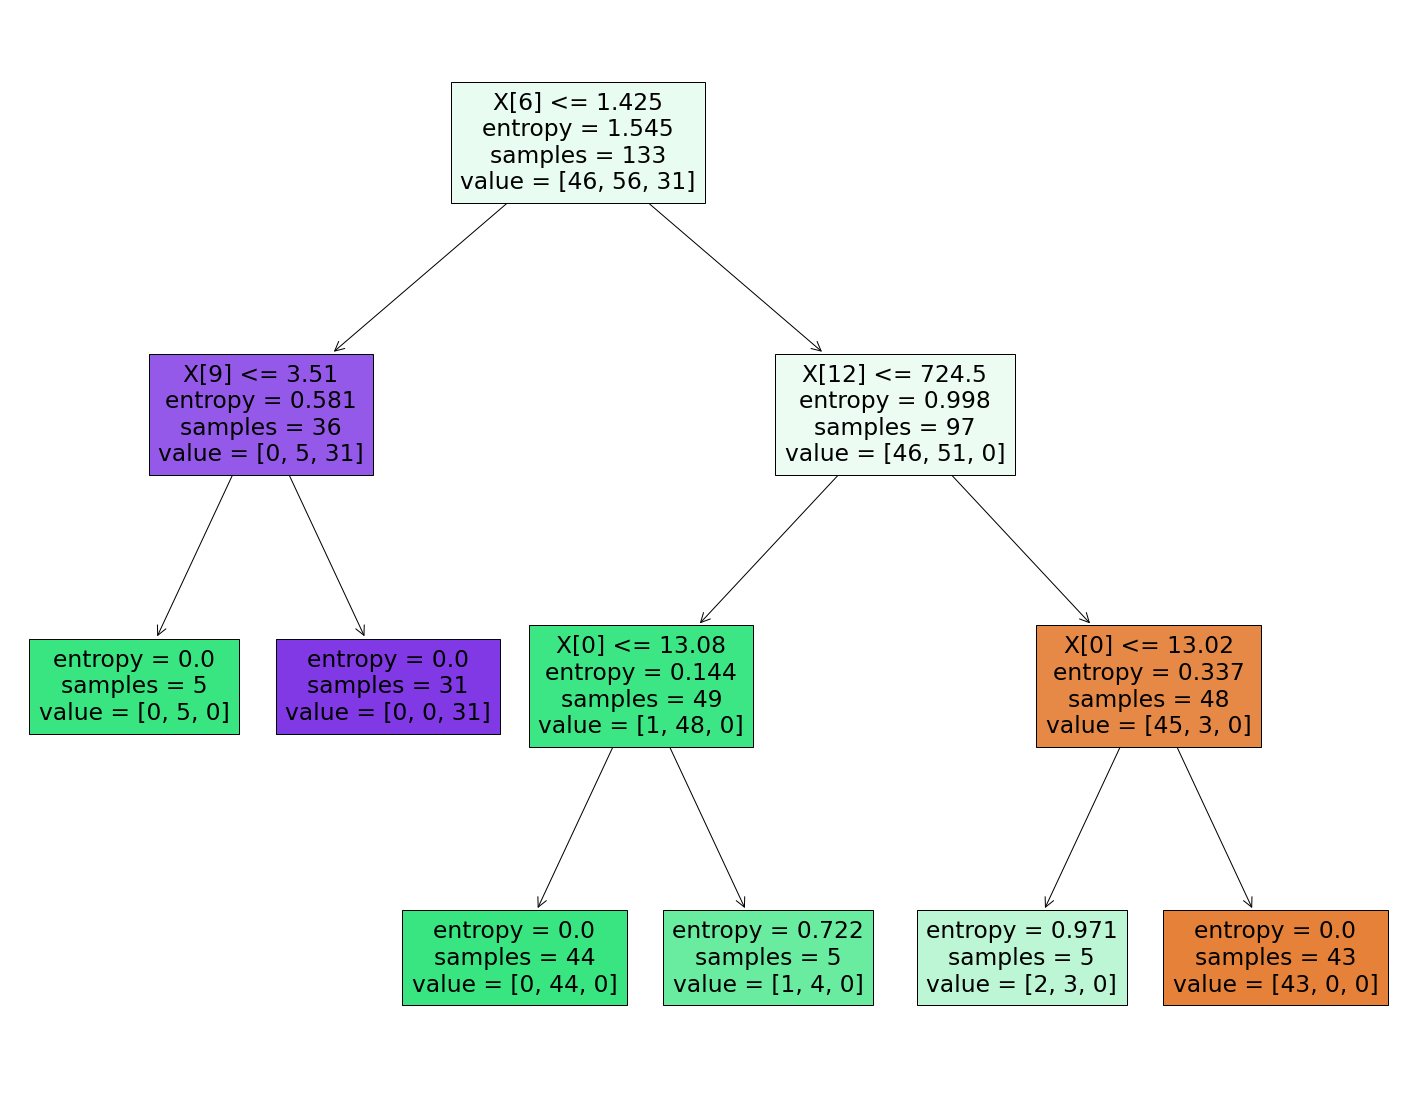

In [102]:
# Calling main function 
if __name__=="__main__": 
    data = main() 

In [98]:
#using gini classifier produces higher accuracy than entropy classifier